In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
ch = pd.read_csv('HeavenlyChocolates.csv',sep = ',')

In [4]:
#1 Using the techniques we have learned in class so far (i.e. DON’T use groupby() method),
#create a dataframe that shows the number of visits to Heavenly Chocoloate’s website using different
#browsers. Your output should be similar to the following table.

In [18]:
Chrome = ch.loc[ch.Browser =='Chrome']
Other = ch.loc[ch.Browser =='Other']
Firefox = ch.loc[ch.Browser =='Firefox']

Chrome_count = Chrome.Customer.count()
Other_count = Other.Customer.count()
Firefox_count = Firefox.Customer.count()
Browser = {'Browser':["Chrome","Other","Firefox"],'Count':[Chrome_count,Other_count,Firefox_count]}
df = pd.DataFrame(data = Browser)

In [19]:
df

,Browser,Count
0,Chrome,27
1,Other,7
2,Firefox,16


In [83]:
#2 Create a duplicate of the following graph to show which browser is used more by the
# Heavenly Chocolate website visitors? The dashed line represents the mean of count visits for all browsers
#in the dataset.

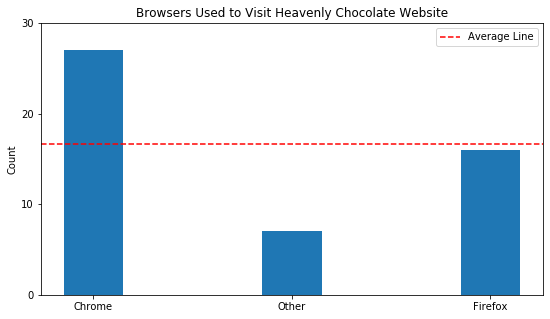

In [65]:
plt.figure(figsize=(9,5))
pos = np.arange(len(df.Browser))
barwidth = 0.3
plt.bar(pos,df.Count, width = barwidth)
average_line = plt.axhline(y=df.Count.mean(),color='red',label='Average Line',linestyle='--')
plt.xticks(pos)
plt.yticks(range(0,31,10))
ax = plt.gca()
ax.set_ylabel('Count')
ax.set_xticklabels(df.Browser)
ax.set_yticklabels([i for i in range(0,31,10)])
ax.set_ylim([0,30])
plt.title('Browsers Used to Visit Heavenly Chocolate Website')
plt.legend()
plt.show()


In [ ]:
#3 Create an duplicate of the following scatterplot that shows the relationship between the
#time spent browsing, and the amount spent buying using either Firefox or Chrome browswers. What
#does this plot tell you about the company’s revenues using both channels?

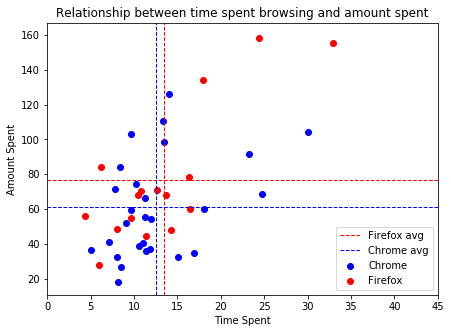

In [66]:
Chrome = ch[ch.Browser =='Chrome']
Firefox = ch[ch.Browser =='Firefox']

plt.figure(figsize=(7,5))

plt.scatter(Chrome['Time'],Chrome['Amount_Spent'],label='Chrome',color='blue')
plt.scatter(Firefox['Time'],Firefox['Amount_Spent'],label='Firefox',color='red')
plt.axhline(y=Firefox.Amount_Spent.mean(),color='red',linestyle='--',linewidth=1)
plt.axvline(x=Firefox.Time.mean(),color='red',linestyle='--',label='Firefox avg',linewidth=1)
plt.axhline(y=Chrome.Amount_Spent.mean(),color='blue',label='Chrome avg',linestyle='--',linewidth=1)
plt.axvline(x=Chrome.Time.mean(),color='blue',linestyle='--',linewidth=1)
ax = plt.gca()
ax.set_xlim([0,45])
plt.xlabel('Time Spent')
plt.ylabel('Amount Spent')
plt.title('Relationship between time spent browsing and amount spent')
plt.legend(loc = 4)
plt.show()

#Judging by the means of the two channels, customers who use Firefox tend to spend more time browsing & more money shopping
# However, Since the customers of Heavenly Chocolates are predominantly using Chrome, we can conclude that more revenues
# are generated through Chrome than Firefox
# In addition, the plot tells us that there is, by and large, a positive (albeit mild) correlation between Time_Spent and Amount_Spent 


In [ ]:
#4 Create the following chart which shows the number of website visitors per day for people
# using Chrome or Firefox.

In [20]:
Chrome_per_day = ch.loc[ch.Browser =='Chrome',['Day','Browser']]
Firefox_per_day = ch.loc[ch.Browser =='Firefox',['Day','Browser']]

In [208]:
Chrome_days ={'Day':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],'Count':[0,0,0,0,0,0,0]}

Firefox_days ={'Day':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],'Count':[0,0,0,0,0,0,0]}

for i in Chrome_per_day['Day']:
        if i == 'Mon':
            Chrome_days['Count'][0]+=1
        elif i == 'Tue':
            Chrome_days['Count'][1]+=1
        elif i == 'Wed':
            Chrome_days['Count'][2]+=1
        elif i == 'Thu':
            Chrome_days['Count'][3]+=1
        elif i == 'Fri':
            Chrome_days['Count'][4]+=1
        elif i == 'Sat':
            Chrome_days['Count'][5]+=1
        else:
            Chrome_days['Count'][6]+=1
            
for i in Firefox_per_day['Day']:
        if i == 'Mon':
            Firefox_days['Count'][0]+=1
        elif i == 'Tue':
            Firefox_days['Count'][1]+=1
        elif i == 'Wed':
            Firefox_days['Count'][2]+=1
        elif i == 'Thu':
            Firefox_days['Count'][3]+=1
        elif i == 'Fri':
            Firefox_days['Count'][4]+=1
        elif i == 'Sat':
            Firefox_days['Count'][5]+=1
        else:
            Firefox_days['Count'][6]+=1
            
Chrome_df = pd.DataFrame(Chrome_days)
Firefox_df = pd.DataFrame(Firefox_days)

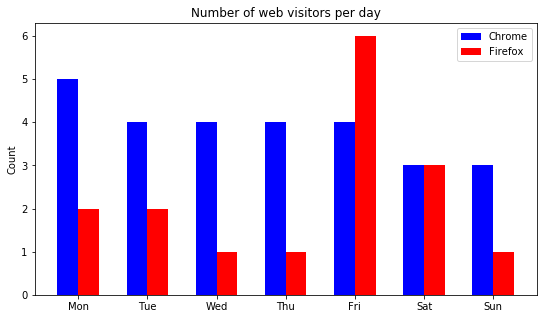

In [209]:
plt.figure(figsize=(9,5))
pos1 = np.arange(len(Chrome_df.Day))
barwidth = 0.3
plt.bar(pos1-0.3/2,Chrome_df.Count, label='Chrome',width = barwidth,color='blue')
plt.bar(pos1+0.3/2,Firefox_df.Count, label='Firefox',width = barwidth,color='red')
ax = plt.gca()
ax.set_ylabel('Count')
plt.xticks(pos1)
ax.set_xticklabels(Firefox_df.Day)
plt.title('Number of web visitors per day')
plt.legend()